In [1]:
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Dropout, InputLayer, Flatten, Reshape, Input
from keras.models import Model, Sequential
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
(X_mat, Y), (X_t_mat, _) = mnist.load_data()
X_mat = X_mat/255
X_t_mat = X_t_mat/255

In [0]:
n_comps = 256
img_shape = X_mat.shape[1:]

encoder = Sequential()
encoder.add(InputLayer(img_shape))
encoder.add(Flatten())                  #flatten image to vector
encoder.add(Dense(n_comps))           #actual encoder

decoder = Sequential()
decoder.add(InputLayer((n_comps,)))
decoder.add(Dense(np.prod(img_shape)))  #actual decoder, height*width*3 units
decoder.add(Reshape(img_shape))         #un-flatten

In [4]:
print(encoder.summary())
print(decoder.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               200960    
Total params: 200,960
Trainable params: 200,960
Non-trainable params: 0
_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 784)               201488    
_________________________________________________________________

In [0]:
input_tensor = Input(img_shape)
cod = encoder(input_tensor)
aprox = decoder(cod)

autoencoder = Model(inputs=input_tensor, outputs=aprox)
autoencoder.compile(optimizer='adamax', loss='mse', metrics=['accuracy'])
# autoencoder.compile(optimizer='SGD', loss='mse', metrics=['accuracy'])

In [6]:
autoencoder.fit(x=X_mat, y=X_mat, epochs=15,
                validation_data=(X_t_mat, X_t_mat))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 10s 171us/step - loss: 0.0097 - acc: 0.3206 - val_loss: 0.0031 - val_acc: 0.3489
Epoch 2/15
60000/60000 [==============================] - 9s 158us/step - loss: 0.0023 - acc: 0.3630 - val_loss: 0.0019 - val_acc: 0.3588
Epoch 3/15
60000/60000 [==============================] - 9s 157us/step - loss: 0.0018 - acc: 0.3697 - val_loss: 0.0017 - val_acc: 0.3739
Epoch 4/15
60000/60000 [==============================] - 9s 157us/step - loss: 0.0017 - acc: 0.3736 - val_loss: 0.0016 - val_acc: 0.3719
Epoch 5/15
60000/60000 [==============================] - 9s 158us/step - loss: 0.0016 - acc: 0.3739 - val_loss: 0.0016 - val_acc: 0.3676
Epoch 6/15
60000/60000 [==============================] - 9s 157us/step - loss: 0.0016 - acc: 0.3747 - val_loss: 0.0015 - val_acc: 0.3656
Epoch 7/15
60000/60000 [==============================] - 9s 157us/step - loss: 0.0016 - acc: 0.3746 - val_loss: 0.0015 -

In [0]:
index = int(np.random.uniform(0, len(X_t_mat)))

img_cod = encoder.predict(np.expand_dims(X_t_mat[index], axis=0))
img_dec = decoder.predict(img_cod)

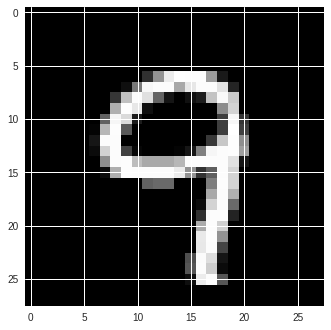

(1, 28, 28)


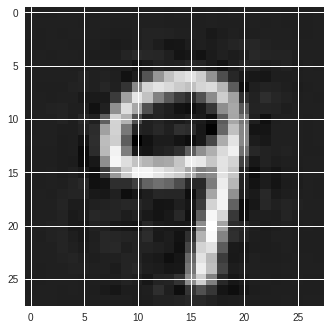

In [23]:
plt.imshow(X_t_mat[index], cmap='gray')
plt.show()
print(img_dec.shape)
plt.imshow(img_dec[0], cmap='gray')
plt.show()

# Ahora usaremos un autoencoder más complejo con un codigo mas pequeño

In [0]:
n_comps = 32
img_shape_deep = X_mat.shape[1:]

encoder_deep = Sequential()
encoder_deep.add(InputLayer(img_shape_deep))
encoder_deep.add(Flatten())                  #flatten image to vector
encoder_deep.add(Dense(512, activation='relu'))
encoder_deep.add(Dense(256, activation='relu'))
encoder_deep.add(Dense(128, activation='relu'))
encoder_deep.add(Dense(n_comps))

decoder_deep = Sequential()
decoder_deep.add(InputLayer((n_comps,)))
decoder_deep.add(Dense(128, activation='relu'))
decoder_deep.add(Dense(256, activation='relu'))
decoder_deep.add(Dense(512, activation='relu'))
decoder_deep.add(Dense(np.prod(img_shape_deep)))  #actual decoder, height*width*3 units
decoder_deep.add(Reshape(img_shape_deep))         #un-flatten

In [18]:
print(encoder_deep.summary())
print(decoder_deep.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_12 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_14 (Dense)             (None, 32)                4128      
Total params: 570,272
Trainable params: 570,272
Non-trainable params: 0
_________________________________________________________________
None

In [19]:
input_tensor_deep = Input(img_shape_deep)
cod_deep = encoder_deep(input_tensor_deep)
aprox_deep = decoder_deep(cod_deep)
print(aprox_deep.shape)

autoencoder_deep = Model(inputs=input_tensor_deep, outputs=aprox_deep)
autoencoder_deep.compile(optimizer='adamax', loss='mse', metrics=['accuracy'])
# autoencoder.compile(optimizer='SGD', loss='mse', metrics=['accuracy'])

(?, 28, 28)


In [20]:
print(img_shape_deep)
print(autoencoder_deep.summary())

(28, 28)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
sequential_5 (Sequential)    (None, 32)                570272    
_________________________________________________________________
sequential_6 (Sequential)    (None, 28, 28)            571024    
Total params: 1,141,296
Trainable params: 1,141,296
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
autoencoder_deep.fit(x=X_mat, y=X_mat, epochs=25,
                validation_data=(X_t_mat, X_t_mat))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 17s 288us/step - loss: 0.0220 - acc: 0.2461 - val_loss: 0.0146 - val_acc: 0.2746
Epoch 2/25
60000/60000 [==============================] - 17s 282us/step - loss: 0.0135 - acc: 0.2848 - val_loss: 0.0121 - val_acc: 0.2840
Epoch 3/25
60000/60000 [==============================] - 17s 282us/step - loss: 0.0116 - acc: 0.2949 - val_loss: 0.0108 - val_acc: 0.2901
Epoch 4/25
60000/60000 [==============================] - 17s 282us/step - loss: 0.0106 - acc: 0.3015 - val_loss: 0.0102 - val_acc: 0.2919
Epoch 5/25
60000/60000 [==============================] - 17s 281us/step - loss: 0.0099 - acc: 0.3057 - val_loss: 0.0098 - val_acc: 0.2959
Epoch 6/25
60000/60000 [==============================] - 17s 282us/step - loss: 0.0094 - acc: 0.3096 - val_loss: 0.0091 - val_acc: 0.3029
Epoch 7/25
60000/60000 [==============================] - 17s 281us/step - loss: 0.0090 - acc: 0.3118 - val_loss: 0.

(28, 28)


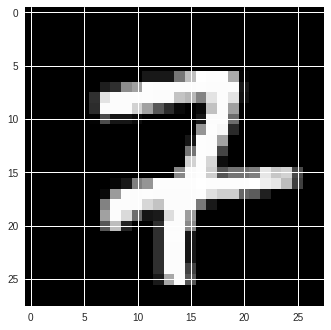

----------------


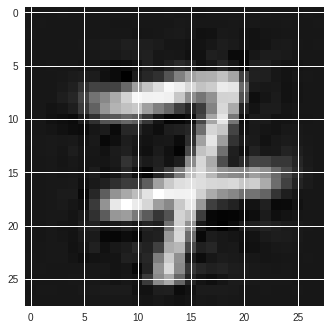

In [26]:
index = int(np.random.uniform(0, len(X_t_mat)))

img_cod = encoder_deep.predict(np.expand_dims(X_t_mat[index], axis=0))
img_dec = decoder_deep.predict(img_cod)

print(img_dec[0].shape)
plt.imshow(X_t_mat[index], cmap='gray')
plt.show()
print('----------------')
plt.imshow(img_dec[0], cmap='gray')
plt.show()